<a href="https://colab.research.google.com/github/Ranjani94/Machine_Learning/blob/master/German_credit_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#German Credit Data

###Business case and value

Original dataset has 20 numeric columns in which 7 columns are numerical and remaining 13 columns are categorical. In the german numeric dataset, all the columns(24 columns) are numeric in which the categorical columns are extended as numerical column to apply the machine learning algorithms. I have used the german numeric dataset to apply all the machine learning algorithms.

This dataset talks about the good or bad credit risks of a person. We can use this dataset to predict the future credit risk of the person applying for loan approvals in financial sectors. We can apply machine learning models to train the model and predict the future credit risk of a person and these details can be used in many sectors to fasten the work and reduce the delay...




# Data Narrative

##Attributes:

Checking_account : 
1: ... < 0 DM
2: 0 <= ... < 200 DM
3: ... >= 200 DM /salary assignments for at least 1 year
4: no checking account

Credit history:
0: no credits taken/all credits paid back duly
1: all credits at this bank paid back duly
2: existing credits paid back duly till now
3: delay in paying off in the past
4: critical account/other credits existing (not at this bank)

Purpose
0: car (new)
1: car (used)

Savings account/bonds:
1: ... < 100 DM
2: 100 <= ... < 500 DM
3: 500 <= ... < 1000 DM
4: .. >= 1000 DM
5: unknown/ no savings account

Present employment since
1: unemployed
2: ... < 1 year
3: 1 <= ... < 4 years
4: 4 <= ... < 7 yearS
5: .. >= 7 years

Other debtors / guarantors
1: none
2: co-applicant
3: guarantor

Housing
1: rent
2: own

Property
1: real estate
2: if not 1 : building society savings agreement/life insurance
3: if not 1/2 : car or other, not in attribute 6
4: unknown / no property



### Mounting drive

In [111]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Machine_Learning'

Mounted at /content/gdrive


### File path and data frames


In [0]:
german_dataset = base_dir + '/german_data.csv'

In [0]:
import pandas as pd
import numpy as np

In [0]:
df_german = pd.read_csv(german_dataset)

In [115]:
df_german.head(2)

,checking_account,duration,credit_history,credit_amount,savings_account,present_emp_since,personål_status,present_residence,property,age,other_insta_plans,existing_credits,num_people_liable,telephone,foreign_worker,new_car,used_car,debators_none,debators_co_applicant,housing_rent,housing_own,job_non_resident_unskilled,job_resident_unskilled,job_skilled,class
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2


In [116]:
df_german.shape

(1000, 25)

### Columns with NaN 

In [117]:
df_german.columns[df_german.isna().any()].tolist()

[]

In [118]:
df_german.dtypes

checking_account              int64
duration                      int64
credit_history                int64
credit_amount                 int64
savings_account               int64
present_emp_since             int64
personål_status               int64
present_residence             int64
property                      int64
age                           int64
other_insta_plans             int64
existing_credits              int64
num_people_liable             int64
telephone                     int64
foreign_worker                int64
new_car                       int64
used_car                      int64
debators_none                 int64
debators_co_applicant         int64
housing_rent                  int64
housing_own                   int64
job_non_resident_unskilled    int64
job_resident_unskilled        int64
job_skilled                   int64
class                         int64
dtype: object

In [119]:
df_german.columns

Index(['checking_account', 'duration', 'credit_history', 'credit_amount',
       'savings_account', 'present_emp_since', 'personål_status',
       'present_residence', 'property', 'age', 'other_insta_plans',
       'existing_credits', 'num_people_liable', 'telephone', 'foreign_worker',
       'new_car', 'used_car', 'debators_none', 'debators_co_applicant',
       'housing_rent', 'housing_own', 'job_non_resident_unskilled',
       'job_resident_unskilled', 'job_skilled', 'class'],
      dtype='object')

# Heatmap: Correlation

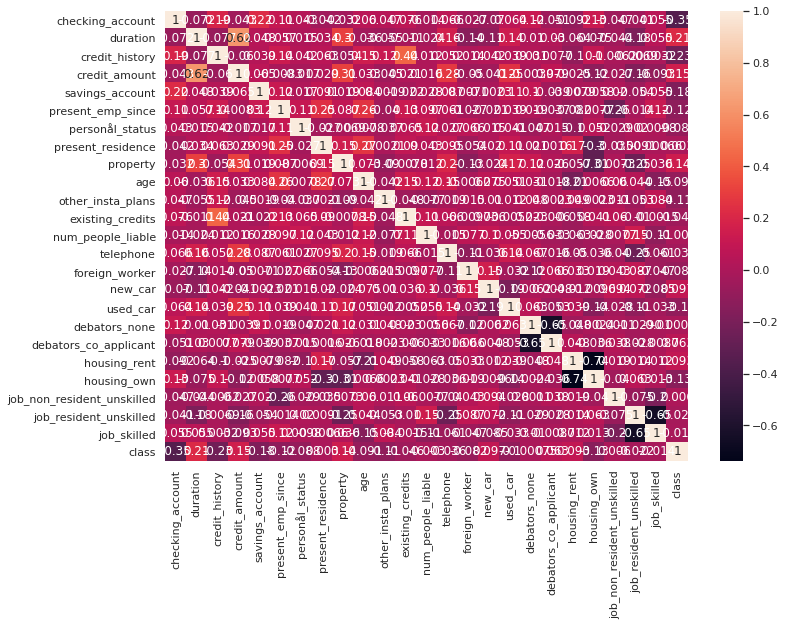

In [120]:
import seaborn as sns
corrMatrix = df_german.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrMatrix, annot=True)

##Visualizing data

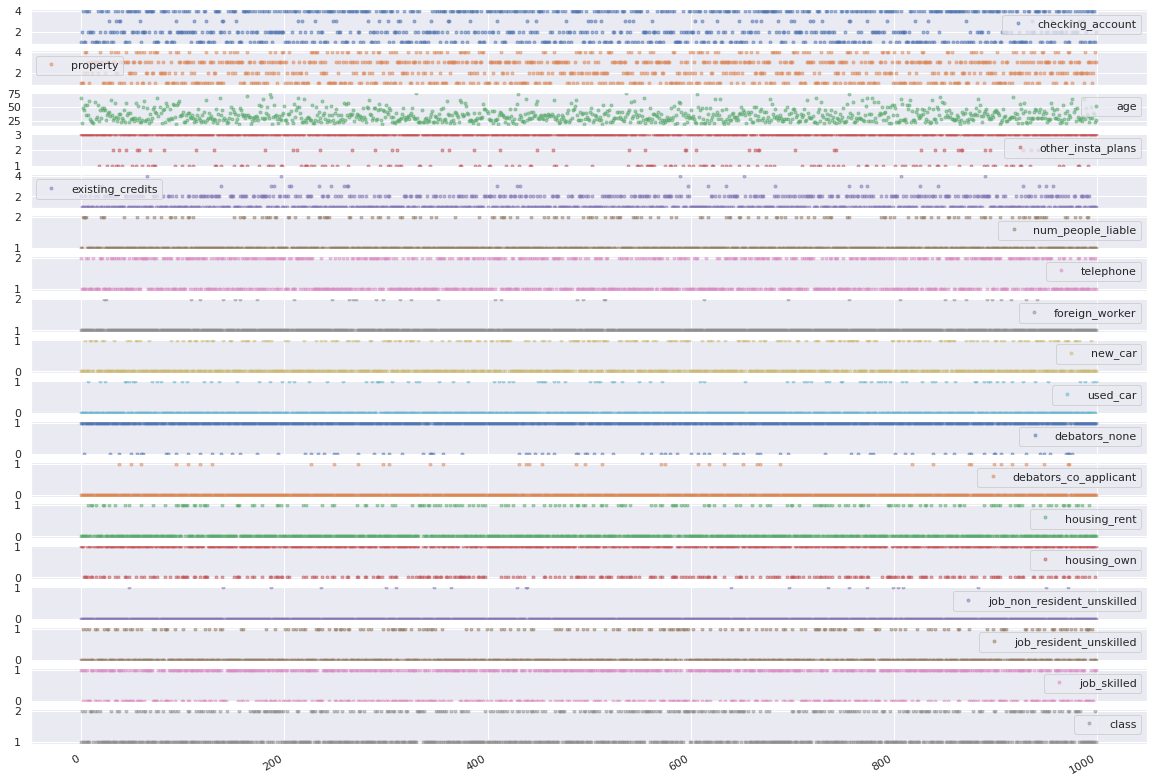

In [121]:
cols_plot = ['checking_account', 'property', 'age', 'other_insta_plans',
      'existing_credits', 'num_people_liable', 'telephone', 'foreign_worker',
       'new_car', 'used_car', 'debators_none', 'debators_co_applicant',
       'housing_rent', 'housing_own', 'job_non_resident_unskilled',
       'job_resident_unskilled', 'job_skilled', 'class']
axes = df_german[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 15), subplots=True)

We can visualize all the features and from that we can see few features are binary and few features are continous 

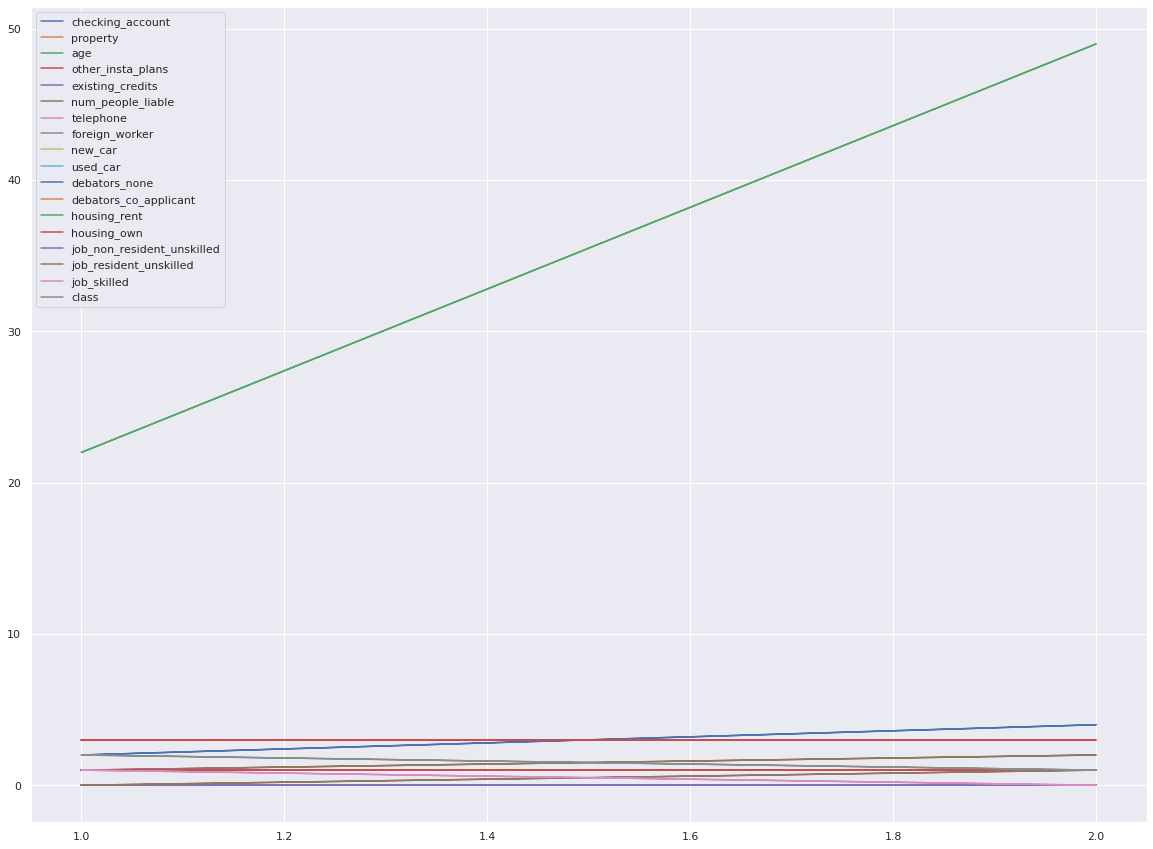

In [122]:
label = df_german['class']
#for i in range(0,4):
ax = df_german.loc[label, cols_plot].plot(figsize=(20, 15))

We can see that age is continuous in number and also raneg between 20 and 50 

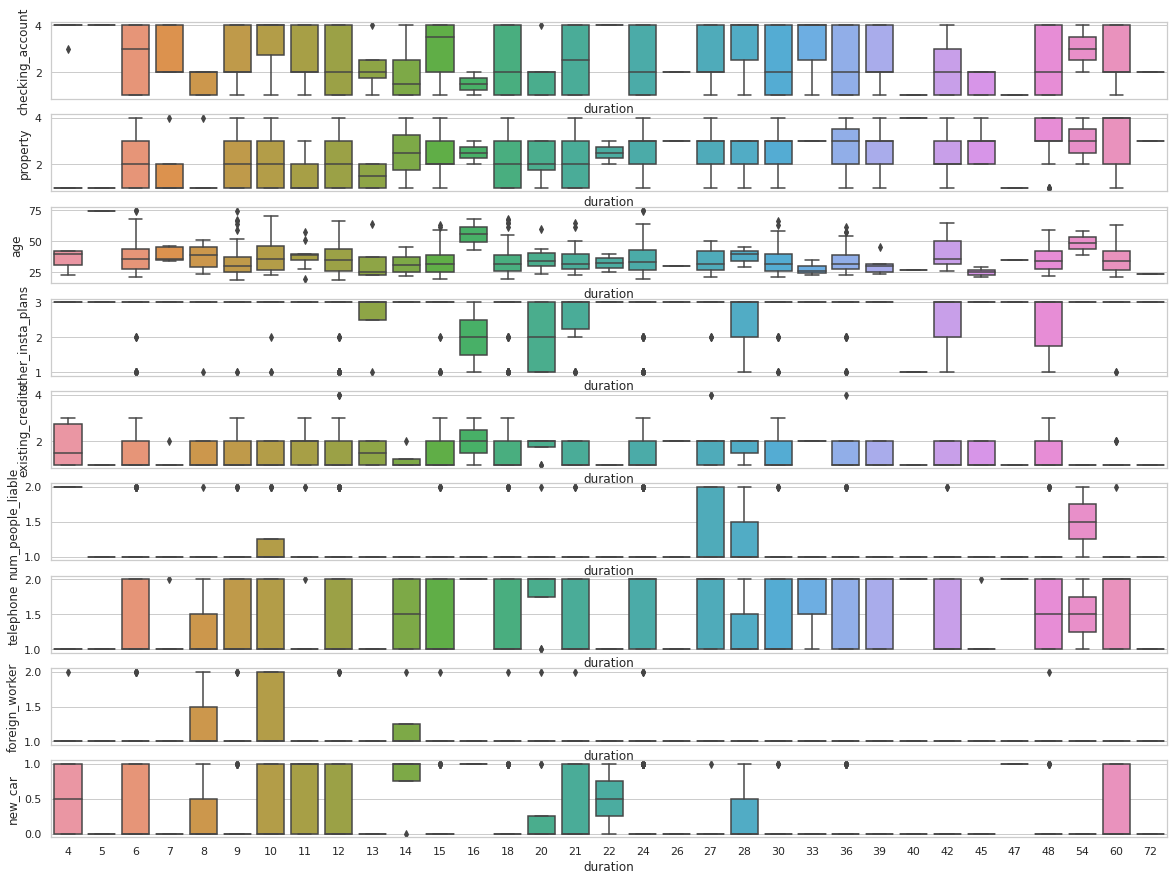

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, axes = plt.subplots(9, 1, figsize=(20,15), sharex=True)
cols_plot = ['checking_account', 'property', 'age', 'other_insta_plans',
      'existing_credits', 'num_people_liable', 'telephone', 'foreign_worker',
       'new_car', 'used_car', 'debators_none', 'debators_co_applicant',
       'housing_rent', 'housing_own', 'job_non_resident_unskilled',
       'job_resident_unskilled', 'job_skilled', 'class']
for name, ax in zip(cols_plot, axes):
  sns.boxplot(data=df_german, x='duration', y=name, ax=ax)

Visualization between the duration in months and every other features in the dataset

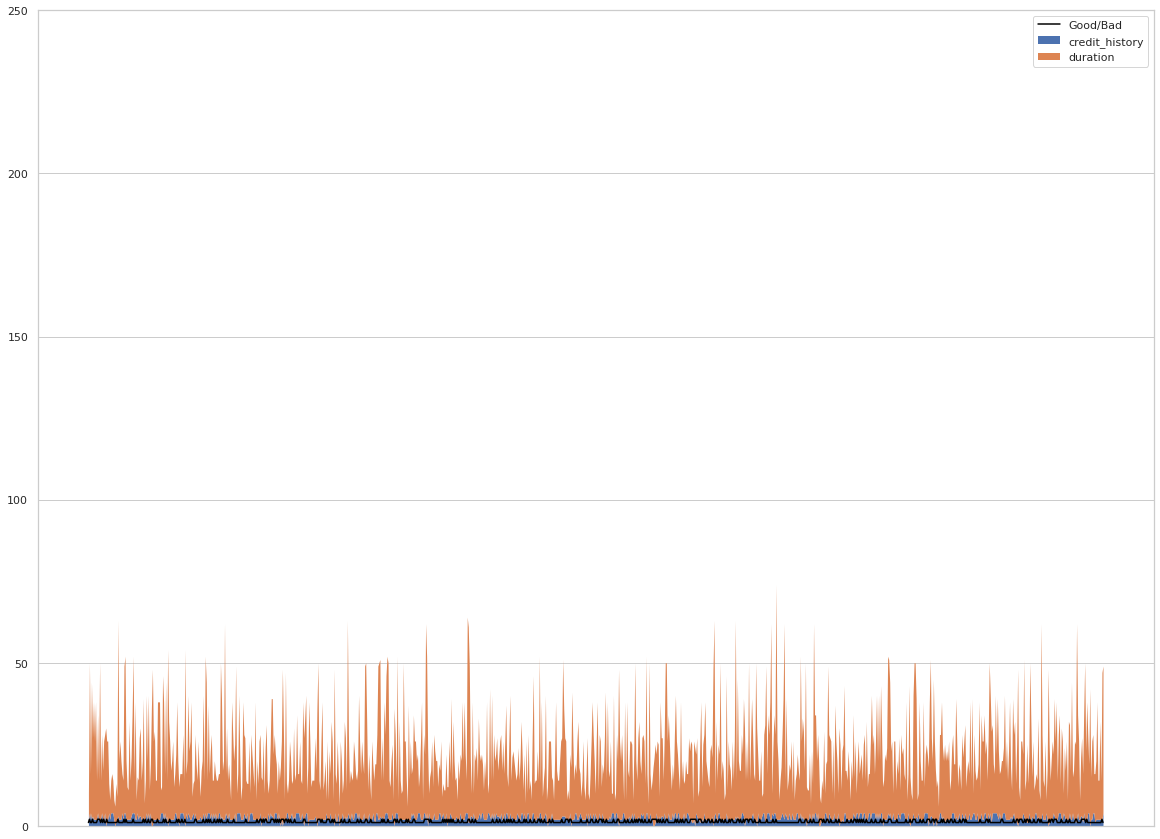

In [124]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(df_german['class'], color='black', label='Good/Bad')
df_german[['credit_history','duration']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0, 250)
ax.legend()

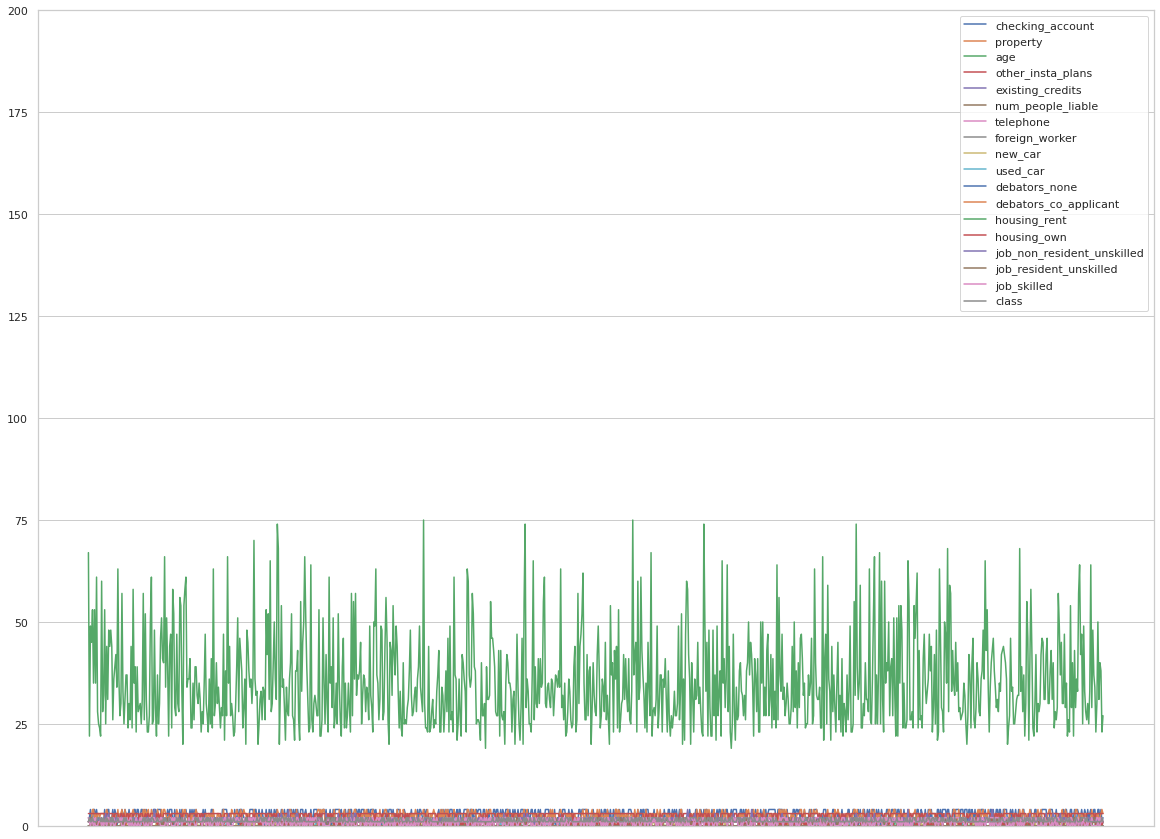

In [125]:
fig, ax = plt.subplots(figsize=(20,15))
for nm in cols_plot:
    ax.plot(df_german[nm], label=nm)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 200)
    ax.legend()

Visualizing between the class labels and age of person in credit data, people from between ages 20 and 40 maintain a good credit score than people above with age 40

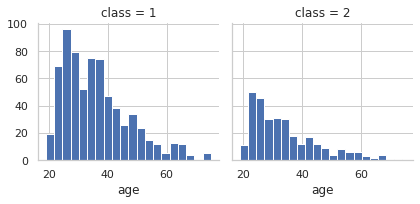

In [126]:
g = sns.FacetGrid(df_german, col='class')
g.map(plt.hist, 'age', bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


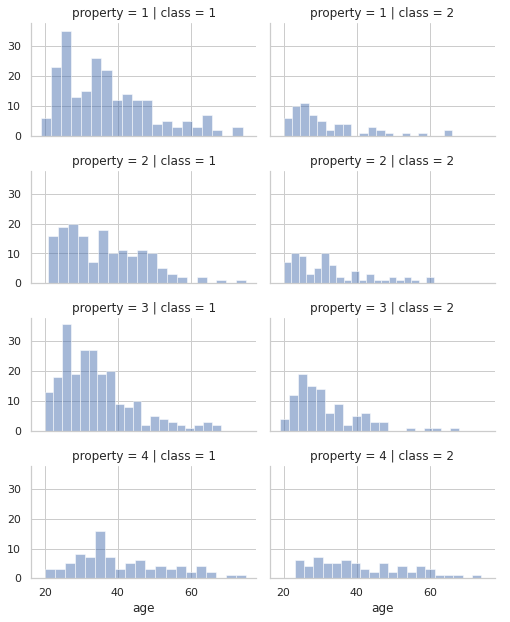

In [127]:
grid = sns.FacetGrid(df_german, col='class', row='property', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

###Silhouette score

Silhouette score is a better measure to decide the number of clusters to be formulated from the data. It is calculated for each instance. The coefficient varies between -1 and 1. A value close to 1 implies that the instance is close to its cluster is a part of the right cluster. Whereas, a value close to -1 means that the value is assigned to the wrong cluster

In [128]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#Use silhouette score
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_german)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df_german, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5803760660599887)
For n_clusters = 3, silhouette score is 0.45502909331258723)
For n_clusters = 4, silhouette score is 0.3217129295269875)
For n_clusters = 5, silhouette score is 0.33094525070058417)
For n_clusters = 6, silhouette score is 0.31181934539636486)
For n_clusters = 7, silhouette score is 0.2947133898040991)
For n_clusters = 8, silhouette score is 0.26138071542803665)
For n_clusters = 9, silhouette score is 0.25940913042346186)


### Elbow method

Elbow method is one of the famous method for determining the optimal value of K

In [0]:
def elbow_method():
    Error =[]
    x = df_german.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]].values
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i).fit(x)
        kmeans.fit(x)
        Error.append(kmeans.inertia_)
    plt.figure(figsize=(5,5))
    plt.plot(range(1, 11), Error)
    plt.title('Elbow method')
    plt.xlabel('No of clusters')
    plt.ylabel('Error')
    plt.show()

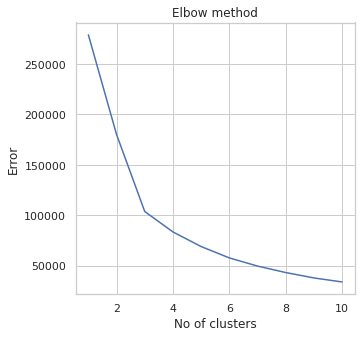

In [130]:
elbow_method()

From the above the elbow method we can define the number of clusters as 3

### K-Means Clustering

In [131]:
x = df_german.iloc[:, 0:24].values
y = df_german.iloc[:, 24:]
col = y.columns

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
df_german['cluster'] = y_kmeans
df_german.tail()

,checking_account,duration,credit_history,credit_amount,savings_account,present_emp_since,personål_status,present_residence,property,age,other_insta_plans,existing_credits,num_people_liable,telephone,foreign_worker,new_car,used_car,debators_none,debators_co_applicant,housing_rent,housing_own,job_non_resident_unskilled,job_resident_unskilled,job_skilled,class,cluster
995,4,12,2,17,1,4,2,4,1,31,3,1,1,1,1,0,0,1,0,0,1,0,1,0,1,1
996,1,30,2,39,1,3,1,4,2,40,3,1,1,2,1,0,1,1,0,0,1,0,0,0,1,0
997,4,12,2,8,1,5,3,4,3,38,3,1,1,1,1,0,0,1,0,0,1,0,0,1,1,1
998,1,45,2,18,1,3,3,4,4,23,3,1,1,2,1,0,0,1,0,0,0,0,0,1,2,1
999,2,45,4,46,2,1,3,4,3,27,3,1,1,1,1,0,1,1,0,0,1,0,0,1,1,0


In [132]:
x.shape

(1000, 24)

In [133]:
y.shape

(1000, 1)

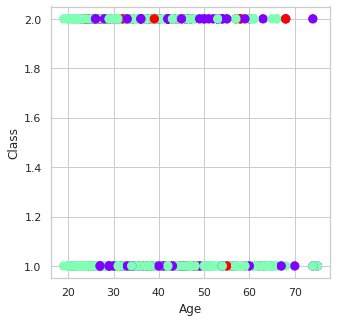

In [134]:
plt.figure(figsize=(5,5))
plt.scatter(df_german['age'], df_german['class'], s=70, c=y_kmeans, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Class')
plt.show()

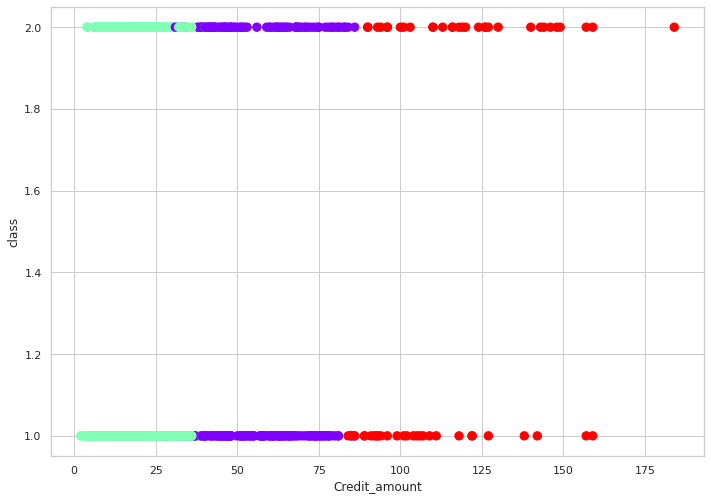

In [135]:
plt.scatter(df_german['credit_amount'], df_german['class'], s=70, c=y_kmeans, cmap='rainbow')
plt.xlabel('Credit_amount')
plt.ylabel('class')
plt.show()

After applying Kmeans clustering to the german credit dataset, we can infer that there are 3 clusters has been formed and when each class label is plotted for the specific feature we can see how they are clustered together to form a 3 different clusters.

###GMM Clustering

In [136]:
from sklearn.mixture import GaussianMixture
#df_german.drop(['cluster'], axis=1,inplace=True)
gmm = GaussianMixture(n_components = 3 , covariance_type='spherical').fit(df_german.iloc[:, 0:24].values)
y_gmm = gmm.predict(df_german.iloc[:, 0:24].values)
df_german['clusterGMM'] = y_gmm
df_german.tail(2)

,checking_account,duration,credit_history,credit_amount,savings_account,present_emp_since,personål_status,present_residence,property,age,other_insta_plans,existing_credits,num_people_liable,telephone,foreign_worker,new_car,used_car,debators_none,debators_co_applicant,housing_rent,housing_own,job_non_resident_unskilled,job_resident_unskilled,job_skilled,class,cluster,clusterGMM
998,1,45,2,18,1,3,3,4,4,23,3,1,1,2,1,0,0,1,0,0,0,0,0,1,2,1,2
999,2,45,4,46,2,1,3,4,3,27,3,1,1,1,1,0,1,1,0,0,1,0,0,1,1,0,2


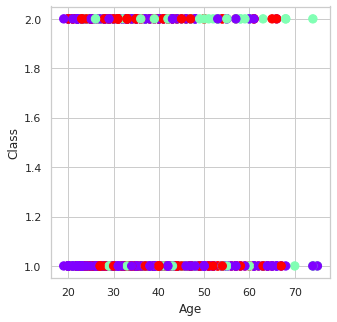

In [137]:
plt.figure(figsize=(5,5))
plt.scatter(df_german['age'], df_german['class'], s=70, c=y_gmm, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Class')
plt.show()

In Kmeans clustering the clusters overlap and couldnt visualize certain points belongs to a particular clusters as cluster are created using the distance measures. To overcome this problem, we use Gaussian Mixture model which uses the probabilitstic approach to clustering. In this approach GMM uses the centroids, covariance and size of the clusters to define each cluster points. In the above given dataset the kmeans and GMM forms almost similar clusters.

###Linear Regression

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [139]:
X_train.shape

(700, 24)

In [140]:
X_test.shape

(300, 24)

In [141]:
y_train.shape

(700, 1)

In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
ypred = reg.predict(X_test)


In [143]:
y_test.shape

(300, 1)

In [144]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, ypred))

Mean squared error: 0.17


In [145]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, ypred))

Coefficient of determination: 0.18


###Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [147]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


###Confusion Matrix

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[190  20]
 [ 54  36]]


###Compute precision, recall, F-measure and support

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.90      0.84       210
           2       0.64      0.40      0.49        90

    accuracy                           0.75       300
   macro avg       0.71      0.65      0.67       300
weighted avg       0.74      0.75      0.73       300



Text(0.5, 527.9871999999999, 'Predicted label')

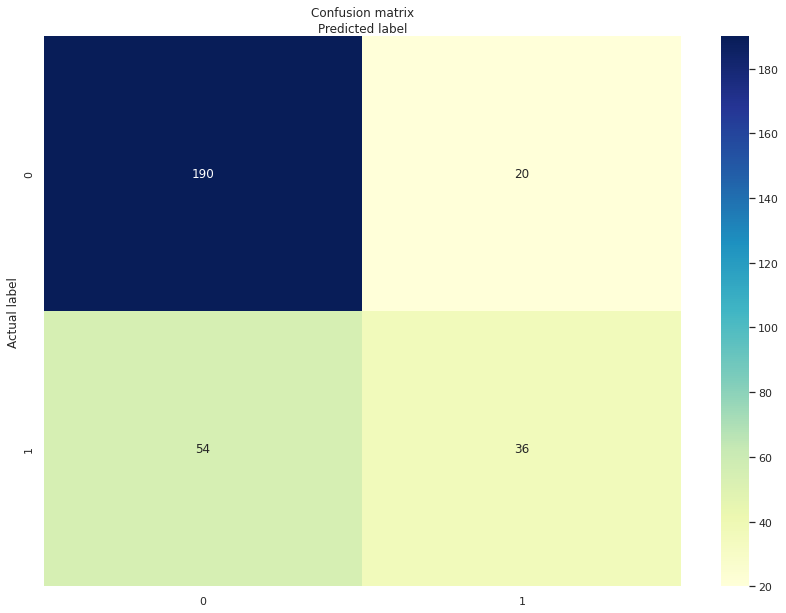

In [150]:
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

###Naive Bayes Classification

In [151]:
from sklearn.naive_bayes import GaussianNB 
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
expected = y_test
predictions_nb = naive_bayes.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score:', accuracy_score(y_test, predictions_nb))

Accuracy score: 0.74


Text(183.4514, 0.5, 'predicted label')

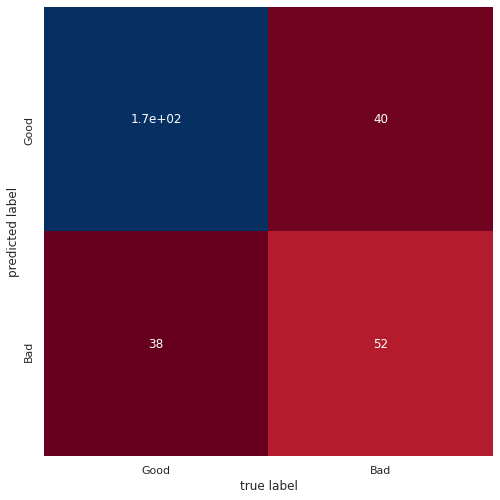

In [153]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions_nb)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [154]:
print(metrics.classification_report(expected, predictions_nb))
print(metrics.confusion_matrix(expected, predictions_nb))

              precision    recall  f1-score   support

           1       0.82      0.81      0.81       210
           2       0.57      0.58      0.57        90

    accuracy                           0.74       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.74      0.74      0.74       300

[[170  40]
 [ 38  52]]


###XGBoost

In [0]:
import xgboost as xgb

In [0]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [0]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [158]:
model = xgb.train(param, D_train, steps)
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.7554563492063492
Recall = 0.6634920634920635
Accuracy = 0.7733333333333333


###Random Forest (Good/Bad)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [161]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 322
Average maximum depth 17


In [0]:
train_rf_predictions = model.predict(X_train)
train_rf_probs = model.predict_proba(X_train)[:, 1]

rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]

In [0]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix,accuracy_score
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    test_labels = y_test
    train_labels = y_train
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [0]:
# evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [165]:
print(confusion_matrix(y_test.round(),y_pred.round()))
print(accuracy_score(y_test.round(), y_pred.round()))

[[190  20]
 [ 54  36]]
0.7533333333333333


###Support Vector Machines

In [166]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [167]:
print('Accuracy score:', accuracy_score(y_test, y_pred_svm))

Accuracy score: 0.7666666666666667


In [168]:
print(metrics.classification_report(expected, y_pred_svm))
print(metrics.confusion_matrix(expected, y_pred_svm))

              precision    recall  f1-score   support

           1       0.79      0.91      0.85       210
           2       0.68      0.42      0.52        90

    accuracy                           0.77       300
   macro avg       0.73      0.67      0.68       300
weighted avg       0.75      0.77      0.75       300

[[192  18]
 [ 52  38]]


###K-Nearest Neighbors

In [169]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [170]:
print('Accuracy score:', accuracy_score(y_test, knn_pred))

Accuracy score: 0.6766666666666666


In [171]:
print(metrics.classification_report(expected, knn_pred))
print(metrics.confusion_matrix(expected, knn_pred))

              precision    recall  f1-score   support

           1       0.73      0.86      0.79       210
           2       0.43      0.24      0.31        90

    accuracy                           0.68       300
   macro avg       0.58      0.55      0.55       300
weighted avg       0.64      0.68      0.65       300

[[181  29]
 [ 68  22]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was

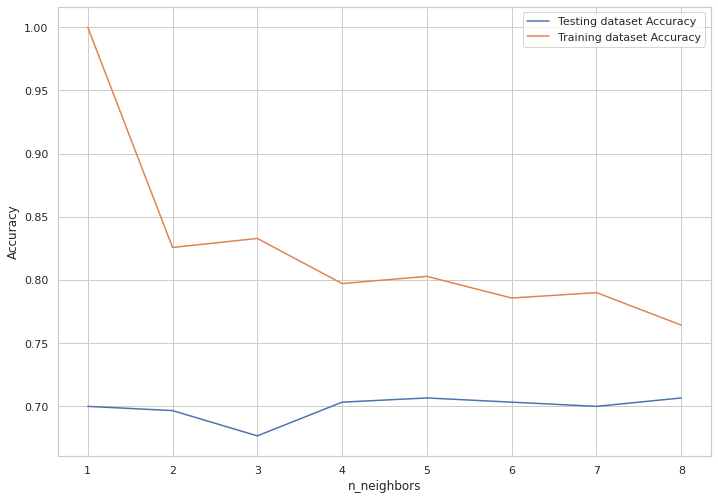

In [172]:
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

###Principal Component Analysis [PCA]

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

In [0]:
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [175]:
principal.tail()

,principal component 1,principal component 2
695,-8.340687,-3.050850
696,-11.295311,0.463857
697,15.902336,-11.157503
698,2.217275,-9.470945
699,0.287203,-9.603272


In [176]:
concat_df = pd.concat([principal, df_german[['class']]], axis=1)
concat_df.head()

,principal component 1,principal component 2,class
0,-32.464821,14.245061,1
1,43.448841,2.770813,2
2,2.271598,2.226428,1
3,-25.160212,0.045470,1
4,-27.995711,4.776585,2


In [177]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.81023515 0.10814971]


<Figure size 842.4x595.44 with 0 Axes>

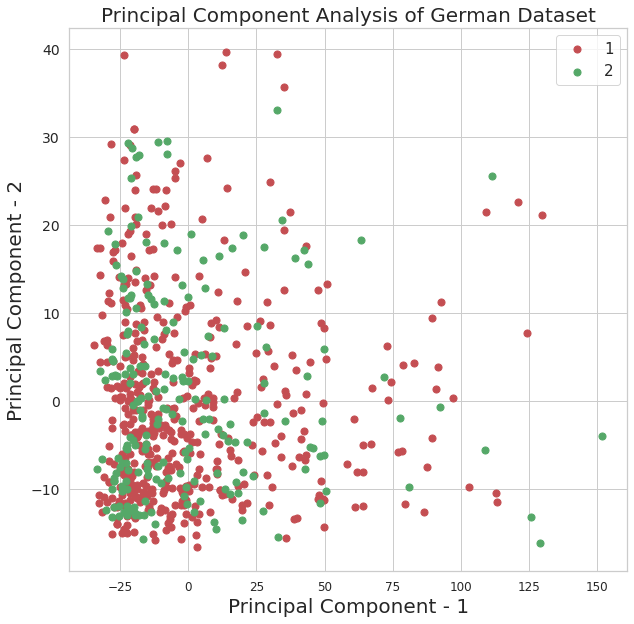

In [178]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of German Dataset",fontsize=20)
targets = [1,2] #1 - Good and 2 - Bad
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = concat_df['class'] == target
    plt.scatter(principal.loc[indicesToKeep, 'principal component 1']
               , principal.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)


plt.legend(targets,prop={'size': 15})

###Comparing all the models [Boxplot]

In [0]:
random_seed = 12

In [0]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()),
          ('Kmeans', KMeans(n_clusters=3)),
          ('GMM', GaussianMixture(n_components = 3 , covariance_type='spherical')), 
          ('NaiveBayes', GaussianNB()),
          ('RandomForest', RandomForestClassifier()),
          ('SVM', SVC()), 
          ('KNN', KNeighborsClassifier(n_neighbors=3))
          ]

We are going to use a k-fold validation to evaluate each algorithm and will run through each model with a for loop, running the analysis and then storing the outcomes into the lists we created above. We’ll use a 10-fold cross validation.

In [181]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for model_name, model in models:
    k_fold_validation = KFold(n_splits=10, random_state=random_seed)
    results = cross_val_score(model, x, y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

LogReg| Mean=0.760000 STD=0.066030
Kmeans| Mean=0.245000 STD=0.166508


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GMM| Mean=0.304000 STD=0.140157
NaiveBayes| Mean=0.732000 STD=0.051923


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

RandomForest| Mean=0.759000 STD=0.041097


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVM| Mean=0.712000 STD=0.051923
KNN| Mean=0.691000 STD=0.035623


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state

From the above it looks like Logistic regression, Naive Bayes, Support vector machine and random forest is performin better than other models. we can take a look at a box plot to see what the accuracy is for each cross validation fold, we can see just how good each does relative to each other and their means.

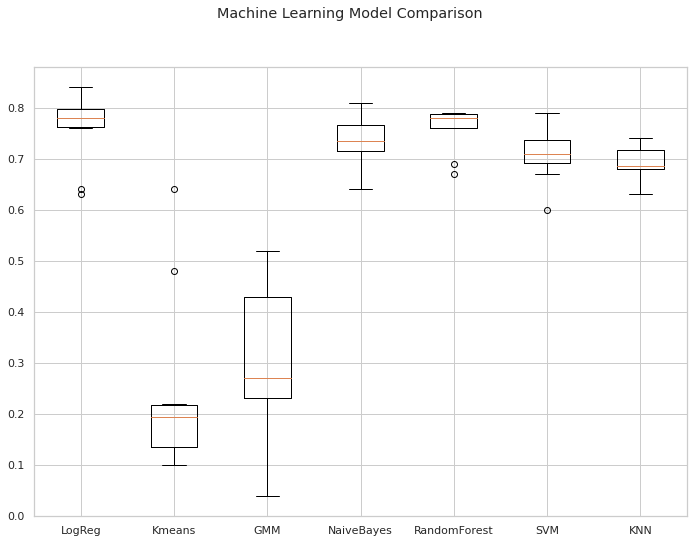

In [182]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

###Conclusion

From the boxplot, we can interpret that these machine learning algorithms perform better with good accuracies(Logistic regression, Naive bayes, random forest). Apart from all these algorithms, PCA performs better since it involves in dimensionality reduction which leads to better results. From this outcome, we might be able to optimize the modeling process to see if one model works a bit better than others.